In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
from tabulate import tabulate

In [204]:
def prepare_data(data):
    data["mint"] = [x.replace("http://nomisma.org/id/", "") for x in data["mint"]]
    data["coin"] = [x.split("#coins?id=")[1] for x in data["coin"]]
    data["material"] = [x.replace("http://nomisma.org/id/", "") for x in data["material"]]
    data["denom"] = [x.replace("http://nomisma.org/id/", "") for x in data["denom"]]
    data["findspot"] = [str(x).replace("file:///C:/Users/karsten/Documents/uni/ProgrammeWorkspace/D2RServer/d2rq-0.8.1_CNT/dump_2021_03_16.rdf#", "") \
                        for x in data["findsport"]]
    data["authority"] = [x.replace(" http://nomisma.org/id/", "") for x in data["authority"]]
    categorial_vars = ["material", "denom", "mint", "collection", "weightstand_engl", "findsport", "authority", "peculiarities_engl" ]
    
    for var in categorial_vars:
        data[var] = data[var].astype('category')
    
    return data

In [205]:
variant = 'kmeans_noCollection'
print("Varialen incl: startate, enate, weight, miniam, maxiam, axis, material, mint, denom")
print("Variablen excl: collection, weightstan,finspot, authority")

#import clusters + raw coin data and merge
clusters = pd.read_csv(f"clusters_{variant}.csv", sep=";")
labels = sorted(clusters[variant].unique())
#clusters['coin'] = clusters['coin'].astype(str)
coin_data = pd.read_csv("C:\\Users\\Leni\\Documents\\UNI\\Data Challenges\\data\\queryResults_semikolon.csv", sep=";")
coin_data = prepare_data(coin_data)
data = coin_data.copy()
data[variant] = clusters[variant].copy()
data['weight'] = pd.to_numeric(data['weight'],errors='coerce')
data['maxdiam'] = pd.to_numeric(data['maxdiam'],errors='coerce')
data['mindiam'] = pd.to_numeric(data['mindiam'],errors='coerce')
# data['weight'].astype(float)
#data_cl = data.join(clusters, on='coin') #data = pd.concat([coin_data, clusters], axis=1)

#print(coin_data.info())
#print(clusters.info())
print(data.info())

#num_var_incl = ['startdate', 'enddate', 'weight', 'mindiam', 'maxdiam', 'axis']
#num_var_excl = []
#cat_var_incl = ['material', 'mint', 'denom']
#cat_var_excl = ['collection', 'weightstand_de', 'findsport', 'authority']

features = ['startdate', 'enddate', 'weight',\
            'mindiam', 'maxdiam', 'axis', 'material', 'mint',\
            'denom', 'collection', 'weightstand_engl', 'findsport', 'authority']


Varialen incl: startate, enate, weight, miniam, maxiam, axis, material, mint, denom
Variablen excl: collection, weightstan,finspot, authority


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           41088 non-null  int64   
 1   coin                 41088 non-null  object  
 2   rdftype              41088 non-null  object  
 3   dcidentif            41088 non-null  object  
 4   obverse              41088 non-null  object  
 5   reverse              41088 non-null  object  
 6   dctitle              41088 non-null  object  
 7   maxdiam              21396 non-null  float64 
 8   datelong             41088 non-null  object  
 9   mindiam              11395 non-null  float64 
 10  weight               466 non-null    float64 
 11  dcpublish            41088 non-null  object  
 12  material             41088 non-null  category
 13  enddate              33315 non-null  float64 
 14  startdate            33313 non-null  float64 
 15  denom              

+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint      | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+-----------+---------+--------------+--------------------+-------------+-------------|
| count  | 4451       | 4451      | 4451    | 4451         | 4451               | 4451        | 4451        |
| unique | 4          | 56        | 33      | 4128         | 17                 | 14          | 16          |
| top    | ar         | byzantium | drachma |              |                    |             |             |
| freq   | 3915       | 522       | 1159    | 324          | 1425               | 4362        | 4359        |
+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        4424 |      4424 |       24 |      1694 |      2846 |   1244 |
| mean  |        -401 |      -368 |        3 |        14 |        14 |      7 |
| std   |          63 |        68 |        3 |         3 |         3 |      4 |
| min   |        -600 |      -550 |        1 |         5 |         5 |      1 |
| 25%   |        -431 |      -404 |        1 |        12 |        11 |      5 |
| 50%   |        -400 |      -360 |        2 |        14 |        14 |      6 |
| 75%   |        -357 |      -325 |        5 |        16 |        16 |     11 |
| max   |         100 |       400 |       11 |        24 |        24 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


                          1425
 Persian                  1083
 reduced persian           424
 Chian                     422
 Phocaic / Persic          308
 Thraco-Macedonian         223
 reduced chian             222
 reduced Aeginetan         152
 reduced attic             101
 Aeginetan                  29
 Samian                     21
 Euboic /Attic              18
 persian?                    8
 Phoenician                  7
 Rhodian                     4
 Attic                       3
 Milesian                    1
 heavy persian               0
 Cistophoric Standard        0
Name: weightstand_engl, dtype: int64


TypeError: Horizontal orientation requires numeric `x` variable.

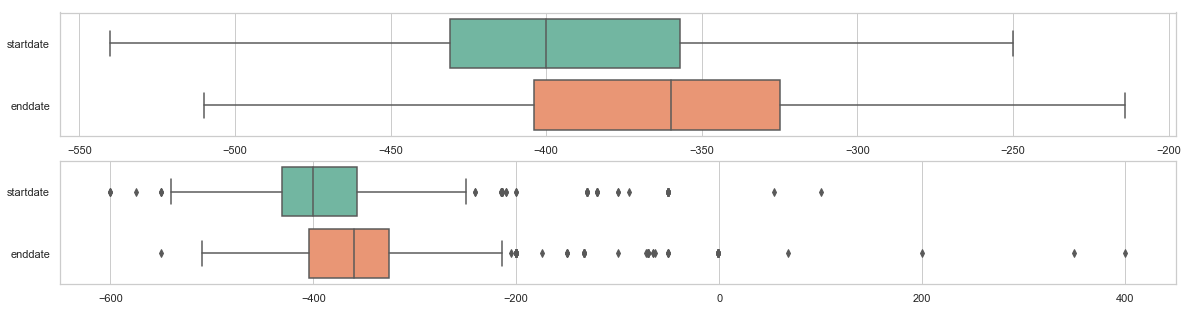

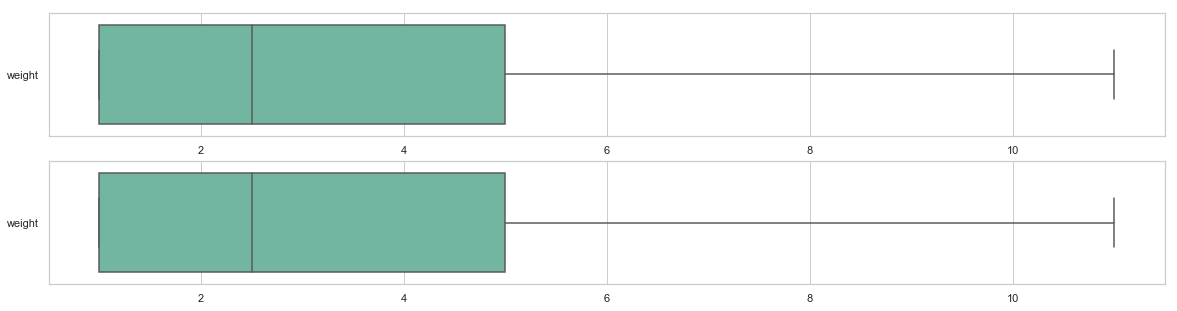

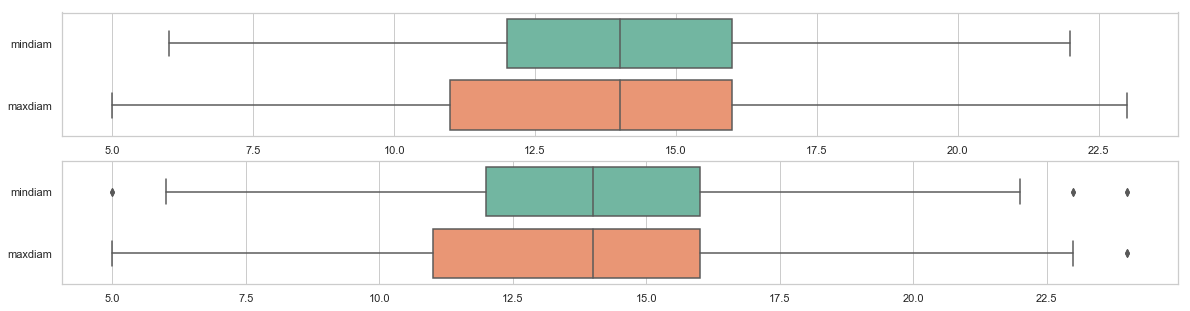

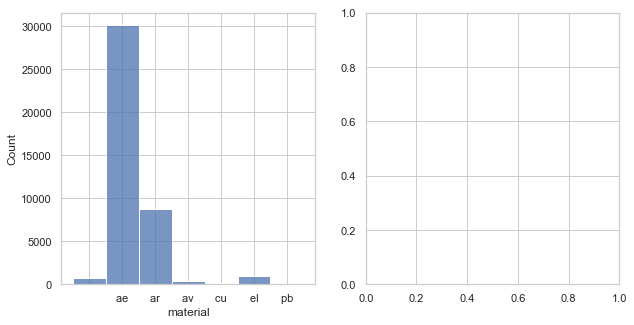

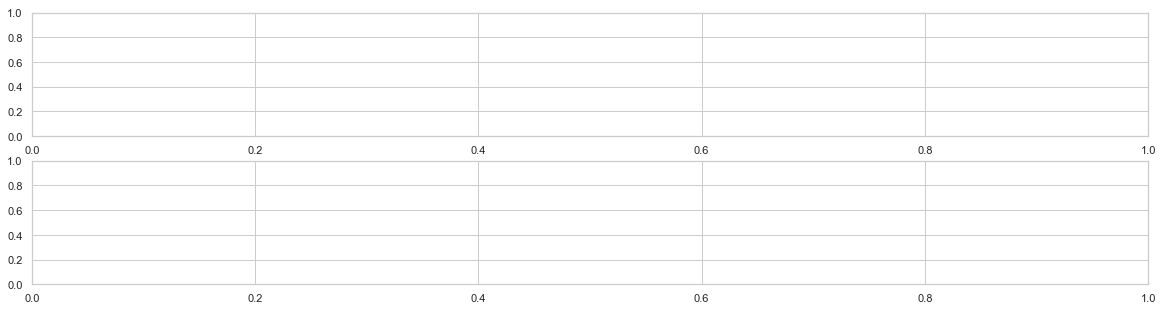

In [231]:
cluster_label = 1

data_sub = data[features].loc[data[variant]==cluster_label]
for i in ['category', 'number', 'object']:
    try:
        print(tabulate(np.round(data_sub.describe(include=i)), headers='keys', tablefmt='psql'))
    except:
        break

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
sns.set_theme(style="whitegrid")
dates = data_sub[['startdate', 'enddate']]
sns.boxplot(data=dates, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
sns.boxplot(data=dates, orient="h", palette="Set2", ax=axes[1])

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
sns.set_theme(style="whitegrid")
weight = data_sub[['weight']]
sns.boxplot(data=weight, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
sns.boxplot(data=weight, orient="h", palette="Set2", ax=axes[1])

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
sns.set_theme(style="whitegrid")
diam = data_sub[['mindiam', 'maxdiam']]
sns.boxplot(data=diam, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
sns.boxplot(data=diam, orient="h", palette="Set2", ax=axes[1])

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x='material', ax=axes[0])
#sns.histplot(data=data, x='authority', ax=axes[1])

#print(data_sub['authority'].value_counts())
print(data_sub['weightstand_engl'].value_counts())

#f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,5))
#weightstand = data_sub['weightstand_engl']
#sns.barplot(y="weightstand_engl", data=data_sub, label="Test", color="b", ax=axes[0])
#sns.histplot(data=data, x='weightstand_engl', ax=axes[0])


C:\Users\Leni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


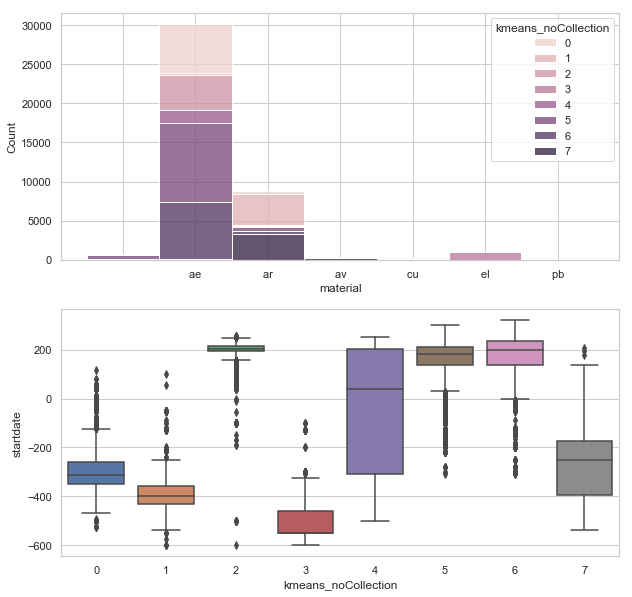

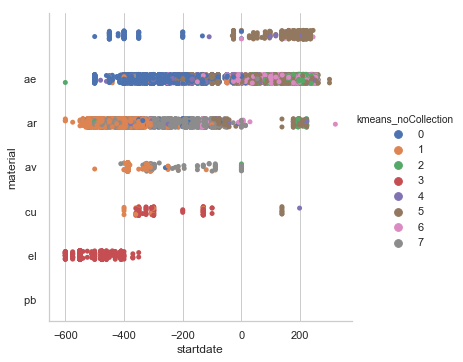

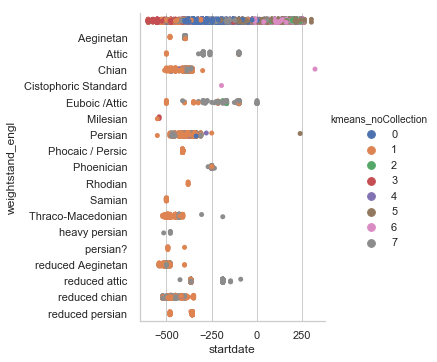

In [229]:
data_sub = data[features]#.loc[data[variant]==cluster_label]
data_sub[variant] = data[variant]

sns.set_theme(style="whitegrid")
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.histplot(data=data_sub, x='material', hue=variant, multiple="stack", ax=axes[0])
sns.boxplot(x=variant, y='startdate', data=data_sub, ax=axes[1]) #group by 1 cat var
sns.catplot(data=data_sub, x="startdate", y="material", hue=variant)
sns.catplot(data=data_sub, x="startdate", y="weightstand_engl", hue=variant)


In [ ]:


#f.tight_layout()
    #ax = sns.catplot(x=var, y=label, data=data)

#TODO: x=startdate, y=materials, colours = clusters

#for var in cat_var:
 #   sns.set_theme(style="whitegrid")
  #  ax = sns.catplot(x=var, y=label, data=data_cl)

#ax = sns.boxplot(data=data, orient="h", palette="Set2") #all numeric values
#data_agg = data.groupby(f"labels_{algo}").agg(["mean", "count"])
#ax = sns.boxplot(x="startdate", y="mint", hue="material", data=data_cl, palette="Set3") #nest by 2 cat var
#ax = sns.boxplot(data=data_cl, orient="h", palette="Set2")
#print(data_cl.loc[data_cl['labels_kmeans']==1])
#data_cl.plot(x =data_cl['axis'].loc[data_cl['labels_kmeans']==1], y=data_cl['axis'].loc[data_cl['labels_kmeans']==1], kind = 'scatter')
#plt.show()
